In [1]:
%load_ext autoreload
%autoreload 2

import torch

from rl4co.envs import CVRPEnv, CVRPTWEnv
from rl4co.models.nn.utils import rollout, random_policy
from rl4co.models.zoo.am import AttentionModel
from rl4co.utils.trainer import RL4COTrainer

In [2]:
env = CVRPTWEnv(
    num_loc=30,
    min_loc=0,
    max_loc=20,
    min_demand=1,
    max_demand=10,
    vehicle_capacity=1,
    min_time=0,
    max_time=480,
)

batch_size = 3

In [3]:
# randomly generated instance
batch_size = 1
td = env.reset(batch_size=[batch_size])
td

TensorDict(
    fields={
        action_mask: Tensor(shape=torch.Size([1, 31]), device=cpu, dtype=torch.bool, is_shared=False),
        current_loc: Tensor(shape=torch.Size([1, 2]), device=cpu, dtype=torch.float32, is_shared=False),
        current_node: Tensor(shape=torch.Size([1, 1]), device=cpu, dtype=torch.int64, is_shared=False),
        current_time: Tensor(shape=torch.Size([1, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        demand: Tensor(shape=torch.Size([1, 30]), device=cpu, dtype=torch.float32, is_shared=False),
        distances: Tensor(shape=torch.Size([1, 31]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([1, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        durations: Tensor(shape=torch.Size([1, 31]), device=cpu, dtype=torch.float32, is_shared=False),
        locs: Tensor(shape=torch.Size([1, 31, 2]), device=cpu, dtype=torch.float32, is_shared=False),
        num_vehicles: Tensor(shape=torch.Size([1]),

In [4]:
# instance = CVRPTWEnv.load_data(fpath="../vrplib/data/instances/C101.txt")
import vrplib

instance = instance = vrplib.read_instance(path="../vrplib/data/instances/C101.txt", instance_format="solomon")
instance.keys()

dict_keys(['name', 'vehicles', 'capacity', 'node_coord', 'demand', 'time_window', 'service_time', 'edge_weight'])

In [5]:
instance

{'name': 'C101',
 'vehicles': 25,
 'capacity': 200,
 'node_coord': array([[40, 50],
        [45, 68],
        [45, 70],
        [42, 66],
        [42, 68],
        [42, 65],
        [40, 69],
        [40, 66],
        [38, 68],
        [38, 70],
        [35, 66],
        [35, 69],
        [25, 85],
        [22, 75],
        [22, 85],
        [20, 80],
        [20, 85],
        [18, 75],
        [15, 75],
        [15, 80],
        [30, 50],
        [30, 52],
        [28, 52],
        [28, 55],
        [25, 50],
        [25, 52],
        [25, 55],
        [23, 52],
        [23, 55],
        [20, 50],
        [20, 55],
        [10, 35],
        [10, 40],
        [ 8, 40],
        [ 8, 45],
        [ 5, 35],
        [ 5, 45],
        [ 2, 40],
        [ 0, 40],
        [ 0, 45],
        [35, 30],
        [35, 32],
        [33, 32],
        [33, 35],
        [32, 30],
        [30, 30],
        [30, 32],
        [30, 35],
        [28, 30],
        [28, 35],
        [26, 32],
        [25, 30]

In [6]:
# TODO: data loader that reads vrplib instance and brings into same format as the random instance from env.reset()

Start rollout...
Done.


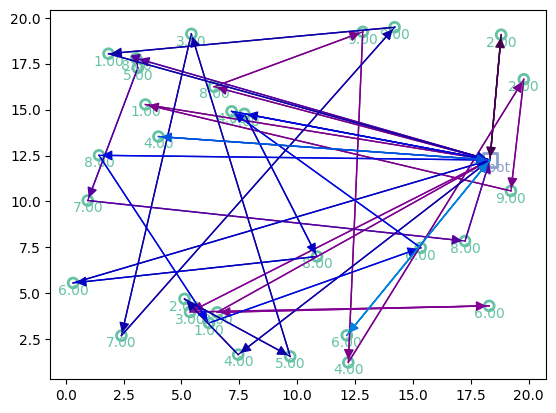

In [7]:
# try random policy with a random instance
batch_size = 3

print("Start rollout...")
reward, td, actions = rollout(
    env=env, td=env.reset(batch_size=[batch_size]), policy=random_policy, max_steps=100
)
print("Done.")
env.render(td, actions)